Test Accuracy: 0.9605

Classification Report:
              precision    recall  f1-score   support

           0     0.9613    0.9888    0.9748       980
           1     0.9859    0.9868    0.9863      1135
           2     0.9493    0.9612    0.9552      1032
           3     0.9476    0.9495    0.9486      1010
           4     0.9681    0.9582    0.9632       982
           5     0.9679    0.9451    0.9563       892
           6     0.9648    0.9739    0.9694       958
           7     0.9691    0.9455    0.9572      1028
           8     0.9553    0.9446    0.9499       974
           9     0.9345    0.9475    0.9409      1009

    accuracy                         0.9605     10000
   macro avg     0.9604    0.9601    0.9602     10000
weighted avg     0.9606    0.9605    0.9605     10000



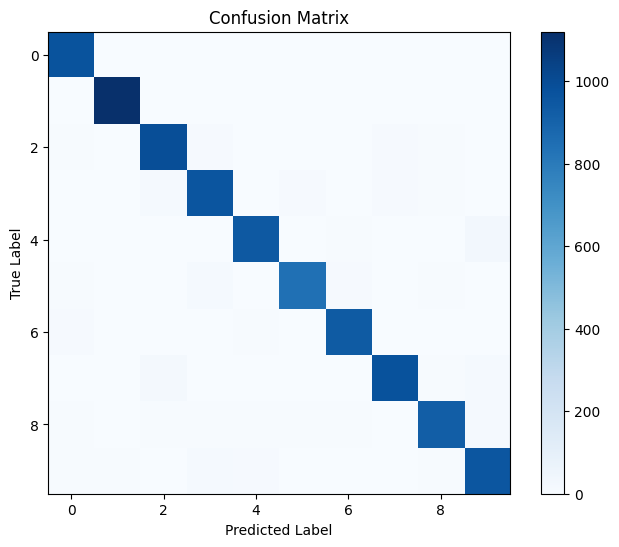

In [2]:

import pandas as pd  # Data handling
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Plotting library
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Evaluation metrics

# Load MNIST data (ensure CSVs are uploaded in Colab)
train = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None, dtype=int)  # Read training data as integers
test = pd.read_csv('/content/sample_data/mnist_test.csv', header=None, dtype=int)  # Read test data as integers

# Split dataset into features (X) and labels (y)
y_train = train.iloc[:, 0]  # First column = label
X_train = train.iloc[:, 1:]  # Remaining columns = pixel values
y_test = test.iloc[:, 0]  # Labels for test set
X_test = test.iloc[:, 1:]  # Features for test set

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=450, random_state=42, n_jobs=-1,  min_samples_leaf=1,  min_samples_split=2, max_depth=25, max_features='sqrt')  # 100 trees, parallel processing
rf.fit(X_train, y_train)  # Train model

# Predict on test data
y_pred = rf.predict(X_test)  # Generate predictions

# Evaluate performance
acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f"Test Accuracy: {acc:.4f}\n")  # Display accuracy

print("Classification Report:")  # Show precision, recall, F1-score
print(classification_report(y_test, y_pred, digits=4))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
plt.figure(figsize=(8,6))  # Set plot size
plt.imshow(cm, interpolation='nearest', cmap='Blues')  # Visualize matrix
plt.title('Confusion Matrix')  # Add title
plt.xlabel('Predicted Label')  # X-axis label
plt.ylabel('True Label')  # Y-axis label
plt.colorbar()  # Add color scale
plt.show()  # Display plot
